In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold 
from keras.optimizers import SGD
from keras.constraints import maxnorm
# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

from keras.datasets import cifar10
from scipy.misc import toimage
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [22]:
#Load data
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [23]:
X_train.shape,X_test.shape

((50000, 3, 32, 32), (10000, 3, 32, 32))

/home/sola/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


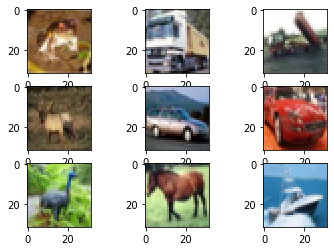

In [24]:
from matplotlib import pyplot

for i in range(0,9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))

pyplot.show()

In [25]:
seed = 7
np.random.seed(seed)

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [27]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [9]:
X_train = np.resize(-1,(32,32,3))
X_test = np.resize(-1,(32,32,3))

In [69]:
# help(np.resize)

In [28]:
X_train = X_train/255.0
X_test =  X_test/255.0

In [29]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [30]:
num_classes = Y_train.shape[1]
num_classes

10

In [31]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [32]:
Y_train.shape,Y_test.shape

((50000, 10), (10000, 10))

In [33]:
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [34]:
model = Sequential()
model.add(Conv2D(filters=32,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
model.add(Dense(num_classes,activation='softmax'))
epochs=25
lrate=0.01
decay = lrate/epochs
sgd = SGD(lr= lrate,decay=decay,momentum=0.9,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy',])


/home/sola/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 4,210,090
Trainable params: 4,210,090
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),nb_epoch=epochs,batch_size=32,verbose=2)
# scores=model.evaluate(X_test,Y_test,verbose=0)
# print("Accuracy: %.2f%%" %(scores[1]*100))

Instructions for updating:
Use tf.cast instead.


/home/sola/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 142s - loss: 1.5913 - acc: 0.4303 - val_loss: 1.3254 - val_acc: 0.5325
Epoch 2/25
 - 148s - loss: 1.2118 - acc: 0.5719 - val_loss: 1.1971 - val_acc: 0.5747
Epoch 3/25
 - 150s - loss: 1.0082 - acc: 0.6464 - val_loss: 1.1113 - val_acc: 0.6047
Epoch 4/25
 - 151s - loss: 0.8273 - acc: 0.7108 - val_loss: 1.1081 - val_acc: 0.6208
Epoch 5/25
 - 151s - loss: 0.6544 - acc: 0.7727 - val_loss: 1.1432 - val_acc: 0.6282
Epoch 6/25
 - 152s - loss: 0.4771 - acc: 0.8371 - val_loss: 1.2270 - val_acc: 0.6303
Epoch 7/25
 - 152s - loss: 0.3129 - acc: 0.8976 - val_loss: 1.3671 - val_acc: 0.6254
Epoch 8/25
 - 154s - loss: 0.1807 - acc: 0.9443 - val_loss: 1.5504 - val_acc: 0.6249
Epoch 9/25
 - 154s - loss: 0.0899 - acc: 0.9785 - val_loss: 1.7907 - val_acc: 0.6288
Epoch 10/25
 - 155s - loss: 0.0400 - acc: 0.9933 - val_loss: 1.9441 - val_acc: 0.6332
Epoch 11/25
 - 444s - loss: 0.0173 - acc: 0.9985 - val_loss: 2.0497 - val_acc: 0.6394
Epoch 12/25
 

KeyboardInterrupt: 

In [28]:
scores=model.evaluate(X_test,Y_test,verbose=0)
print("Accuracy: %.2f%%" %(scores[1]*100))

Accuracy: 64.66%


In [ ]:
#Can increase the accuracy by increasing the network topology and other parameters..
#Test with random samples
from matplotlib import pyplot
from scipy.misc import toimage
from keras import backend as K
pyplot.imshow((X_test[4].reshape(32,32)))
pyplot.show()
Y_test[4]